<font color = green >

## Home Task: Implement K-means algorithm

</font>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import random

In [2]:
%matplotlib notebook

<font color = green >

###  Data 

</font>



<IPython.core.display.Javascript object>


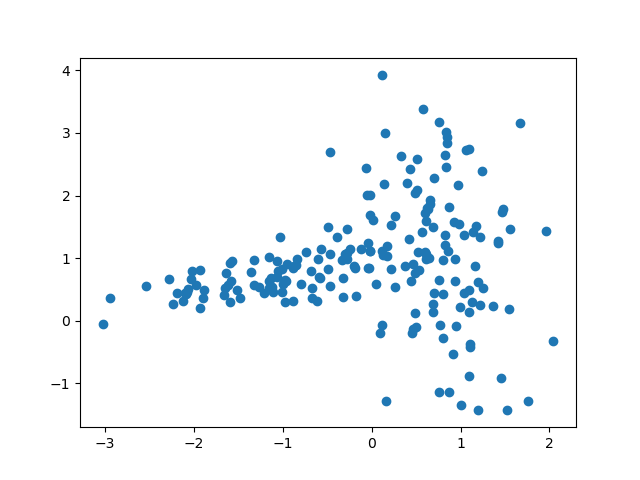

In [3]:
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

<font color = green >

###  Steps of implementatiion

</font>

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

In [4]:
class My_KMean():
    
    def __init__(self, n_centroids = 5, max_iter = 25, random_state = None):
        self.n_centroids = n_centroids
        self.max_iter = max_iter
        random.seed(random_state)
    
    
    def fit(self, data = np.empty(0)):
        self.data = np.array(data)
        
        if self.data.size == 0 :
            raise Exception("Please, provide the data")
        
        self.n_samples = self.data.shape[0]
        try:
            self.n_features = self.data.shape[1]
        except:
            self.n_features = 1
            
        if self.n_samples < self.n_centroids:
            raise Exception("Amount of centroids is bigger than size of train data")
        
        self.initialize()
        cost = self.cost()
        current_iter = 0
        while(-1):
            current_iter += 1
            prev_cost = self.cost()
            self.new_centroids()
            cost = self.cost()
            n_iter = 0
            if cost >= prev_cost:
                break
            if current_iter > self.max_iter:
                print("Stopped due to the max_iter limit \nYou might consider increasing that parameter to improve the score")
                break
       
        return cost
                
            
    def initialize(self):
        data_copy = self.data
        self.centroids_array = np.empty((self.n_centroids, self.n_features))
        
        for i in range(self.n_centroids):
            a = random.randint(0, data_copy.shape[0]-1)
            self.centroids_array[i] = data_copy[a]
            # Probably it would be better to avoid initializing two centroids at the same point
            data_copy = np.delete(data_copy, a, axis = 0)
            
    
    
    def calc_distance(self, data = np.empty(0)):
        if data.size == 0:
            data = self.data
        
        #np.linalg.norm(a-b, axis) = 
        dists = np.sqrt((np.square(data[:,np.newaxis]-self.centroids_array).sum(axis=2)))
        
        return dists
        
        
    def assign(self, data = np.empty(0)):
        if data.size == 0:
            data = self.data
        dists = self.calc_distance(data)
        assignment = np.argmin(dists, axis=1)
        return assignment
        
        
    def new_centroids(self):
        assignment = self.assign()  
        for i in range(self.n_centroids):
            indexes = np.where(assignment == i)
            self.centroids_array[i] = np.mean(self.data[indexes], axis = 0)
            
    
    def cost(self):
        dists = self.calc_distance()
        J = np.sum(np.min(dists, axis=1)**2)/self.n_samples
        return J
    
    
    def visualize(self, data = np.empty(0)): #Two dimensioanal data only
        if self.n_features != 2:
            return "I won't!!!"
        
        if data.size == 0:
            data = self.data
        
        # Just to ensure the same axis range for train and predicted data
        plot_range = [np.min(self.data[:,0])-0.2, np.max(self.data[:,0])+0.2, 
                      np.min(self.data[:,1])-0.2, np.max(self.data[:,1])+0.2]
        
        plt.figure()
        plt.axis(plot_range)
        assignment = self.assign(data)
        np.random.seed(2019)
        for i in range(self.centroids_array.shape[0]):
            indexes = np.where(assignment == i)
            c = np.random.rand(1,3)
            plt.scatter(data[indexes][:,0], data[indexes][:,1], c = c, alpha=0.25)
            plt.scatter(self.centroids_array[i][0], self.centroids_array[i][1], c = c, marker="2", s = 500, alpha = 1)
            
            
    def predict(self, data):
        prediction = self.assign(data)
        self.visualize(data)
        return prediction
    
    
    def run_few_times(self, data = np.empty(0), n_iter = 100, plot_best = False):
        costs = np.empty(n_iter)
        centroids_set = np.empty((n_iter, self.n_centroids, self.n_features))
        
        for i in range(n_iter):
            costs[i] = self.fit(data)
            centroids_set[i] = self.centroids_array

        self.centroids_array = centroids_set[np.argmin(costs)]
        if plot_best:
            a.visualize()
        
        print ("The lowest cost is {:.5}".format(np.min(costs)))
        return (centroids_set[np.argmin(costs)])

In [5]:
a = My_KMean(4)
a.fit(Xc_2)

0.46383720396920963

<IPython.core.display.Javascript object>


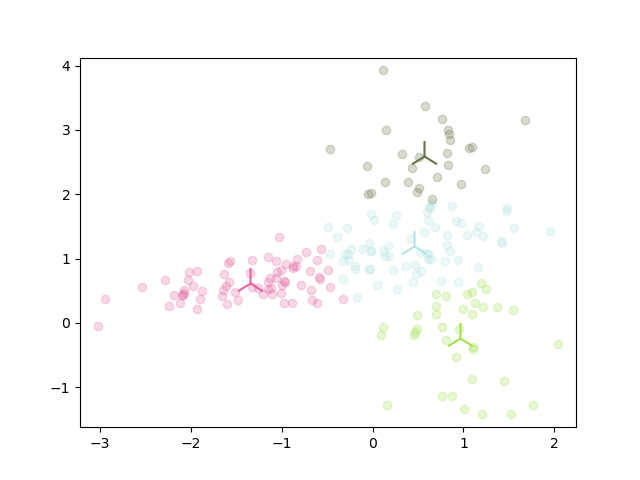

In [6]:
a.visualize()

<IPython.core.display.Javascript object>


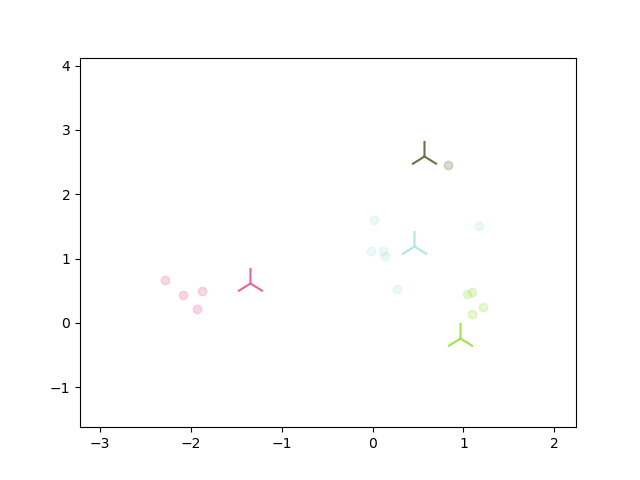

array([2, 1, 3, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1], dtype=int64)

In [7]:
a.predict(np.array(Xc_2[10:25]))

<IPython.core.display.Javascript object>


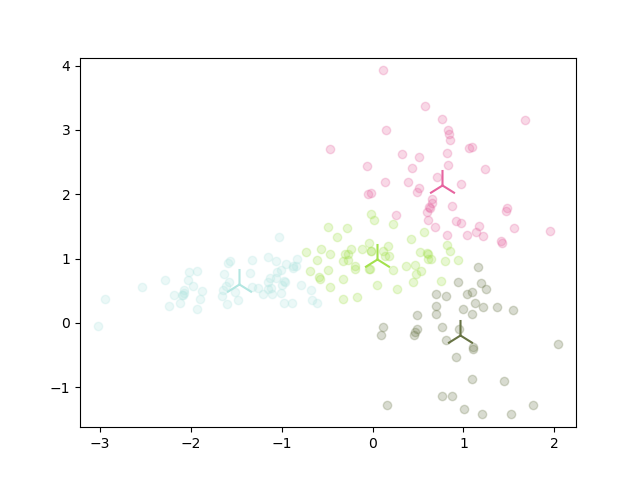

The lowest cost is 0.45769


array([[ 0.76885808,  2.14333659],
       [ 0.0467027 ,  0.99993105],
       [-1.46901201,  0.59888478],
       [ 0.96220912, -0.18860474]])

In [8]:
a.run_few_times(data = Xc_2, n_iter = 100, plot_best = True)